In [2]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [3]:
import pandas as pd

# Adjust the path to the location of your data file in Google Drive
file_path = '/content/drive/My Drive/DEPI/customer/Mall_Customers.csv'
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to verify it loaded correctly
df.head()


,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
from sklearn.preprocessing import StandardScaler

# Select features for clustering
features = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)


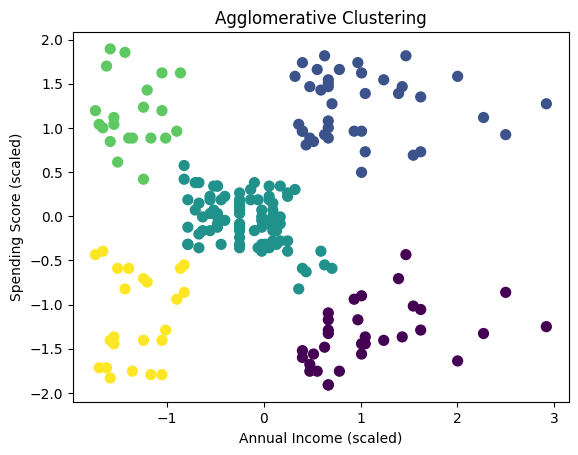

In [5]:
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Apply Agglomerative Clustering
agglomerative = AgglomerativeClustering(n_clusters=5)  # Adjust number of clusters as needed
clusters = agglomerative.fit_predict(scaled_features)

# Plotting the results
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, s=50, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()


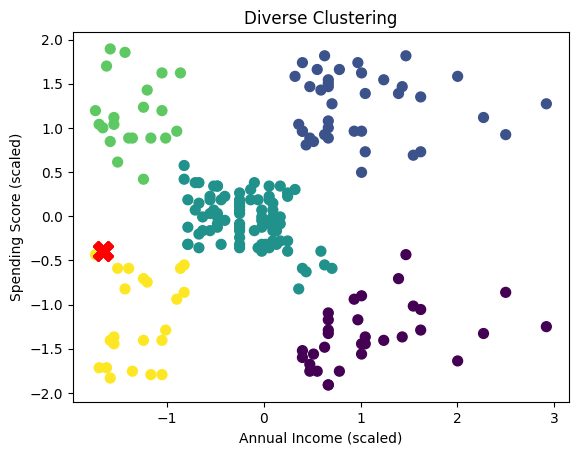

In [7]:
from sklearn.metrics.pairwise import euclidean_distances
import numpy as np

# Function to select diverse clusters
def select_diverse_clusters(X, labels):
    unique_labels = np.unique(labels)
    if len(unique_labels) == 0:
        return np.array([])  # No clusters to select from

    centers = np.array([X[labels == label].mean(axis=0) for label in unique_labels])
    distances = euclidean_distances(centers, centers)
    np.fill_diagonal(distances, np.inf)

    selected = []
    while len(selected) < len(unique_labels):
        if len(selected) == 0:
            next_center = np.argmin(np.min(distances, axis=1))
        else:
            distances[:, selected] = np.inf
            next_center = np.argmin(np.min(distances, axis=1))

        selected.append(next_center)

    return unique_labels[selected]


# Select diverse clusters
diverse_clusters = select_diverse_clusters(scaled_features, clusters)

# Plotting the results with diverse clusters highlighted
plt.scatter(scaled_features[:, 0], scaled_features[:, 1], c=clusters, s=50, cmap='viridis')
plt.scatter(scaled_features[diverse_clusters, 0], scaled_features[diverse_clusters, 1], s=200, c='red', marker='X')
plt.title('Diverse Clustering')
plt.xlabel('Annual Income (scaled)')
plt.ylabel('Spending Score (scaled)')
plt.show()
